## Music Style Detector : data preparation

This notebook contains steps to prepare data for training and testing the music style detector. We split the data with a traditional 80/20 split. Validation set will be created during training.

In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [28]:
RAW_DIR = os.path.abspath(os.path.join(os.getcwd(), '../..', 'models', 'genre_detector', 'data', 'raw')) # path to raw dataset
PREPARED_DIR = os.path.abspath(os.path.join(os.getcwd(), '../..', 'models', 'genre_detector', 'data', 'prepared')) # path to prepared dataset
fma_genres_df = pd.read_csv(os.path.join(RAW_DIR, 'fma_genres.csv'))
gtzan_genres_df = pd.read_csv(os.path.join(RAW_DIR, 'gtzan_genres.csv'))
merged_df = pd.concat([fma_genres_df, gtzan_genres_df], ignore_index=True)
print("There are {} rows in fma genres dataset".format(len(fma_genres_df)))
print("There are {} rows in gtzan genres dataset".format(len(gtzan_genres_df)))
print("There are {} rows in merged genres dataset".format(len(merged_df)))
merged_df.head()

There are 6560 rows in fma genres dataset
There are 999 rows in gtzan genres dataset
There are 7559 rows in merged genres dataset


,filename,genre_label,genre_id
0,082066.mp3,Classical,1
1,065795.mp3,Classical,1
2,011721.mp3,Classical,1
3,145568.mp3,Classical,1
4,070936.mp3,Classical,1


In [29]:
# count number of songs per genre and keep only genre_id column
count = merged_df.groupby('genre_label')["genre_id"].count()
count

genre_label
Blues          210
Classical     1100
Country        294
Disco          177
Electronic     998
Hip-Hop       1100
Jazz           670
Metal          311
Pop           1099
Reggae         500
Rock          1100
Name: genre_id, dtype: int64

Minimum number of songs per genre: 177


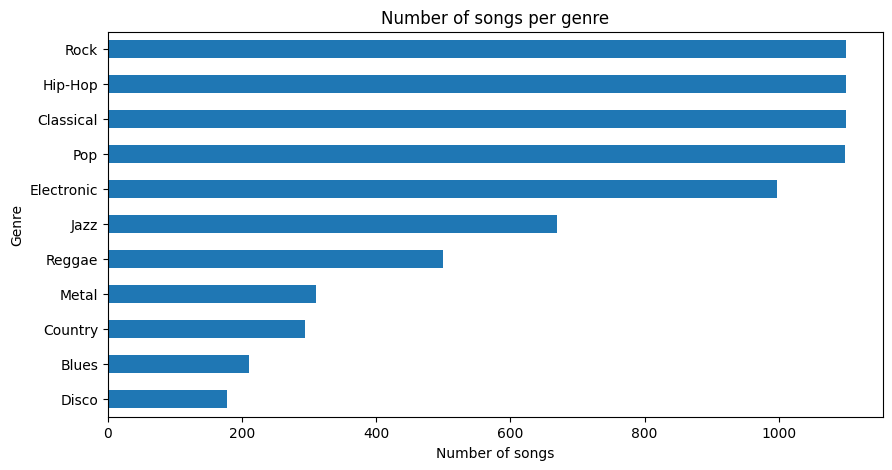

In [30]:
minimum_songs_per_genre = merged_df.groupby('genre_label')["genre_id"].count().min()
print("Minimum number of songs per genre: {}".format(minimum_songs_per_genre))
# plot number of songs per genre, horizontal bar chart, sorted by number of songs
count.sort_values().plot(kind='barh', figsize=(10, 5))
plt.title("Number of songs per genre")
plt.xlabel("Number of songs")
plt.ylabel("Genre")
plt.show()

In [31]:
# delete genres to have minimum_songs_per_genre songs per genre (set a seed to be able to reproduce the results and create the same dataset)
np.random.seed(42)
merged_df = merged_df.groupby('genre_label').apply(lambda x: x.sample(minimum_songs_per_genre)).reset_index(drop=True)
print("There are {} rows in merged genres dataset".format(len(merged_df)))
merged_df.head()

There are 1947 rows in merged genres dataset


,filename,genre_label,genre_id
0,004540.mp3,Blues,0
1,blues.00062.wav,Blues,0
2,078747.mp3,Blues,0
3,blues.00089.wav,Blues,0
4,038539.mp3,Blues,0


In [32]:
# count number of songs per genre and keep only genre_id column
count = merged_df.groupby('genre_label')["genre_id"].count()
count

genre_label
Blues         177
Classical     177
Country       177
Disco         177
Electronic    177
Hip-Hop       177
Jazz          177
Metal         177
Pop           177
Reggae        177
Rock          177
Name: genre_id, dtype: int64

In [33]:
if not os.path.exists(PREPARED_DIR):
    os.makedirs(PREPARED_DIR)

# select 80% of the songs for training and 20% for testing (keep same proportion of songs per genre)
train_df, test_df = train_test_split(merged_df, test_size=0.2, random_state=42, stratify=merged_df['genre_label'])

print("There are {} rows in train dataset".format(len(train_df)))
print("There are {} rows in test dataset".format(len(test_df)))
train_df.head()

There are 1557 rows in train dataset
There are 390 rows in test dataset


,filename,genre_label,genre_id
649,023543.mp3,Disco,3
1755,121917.mp3,Reggae,9
455,country.00080.wav,Country,2
1196,jazz.00032.wav,Jazz,6
1229,001152.mp3,Jazz,6


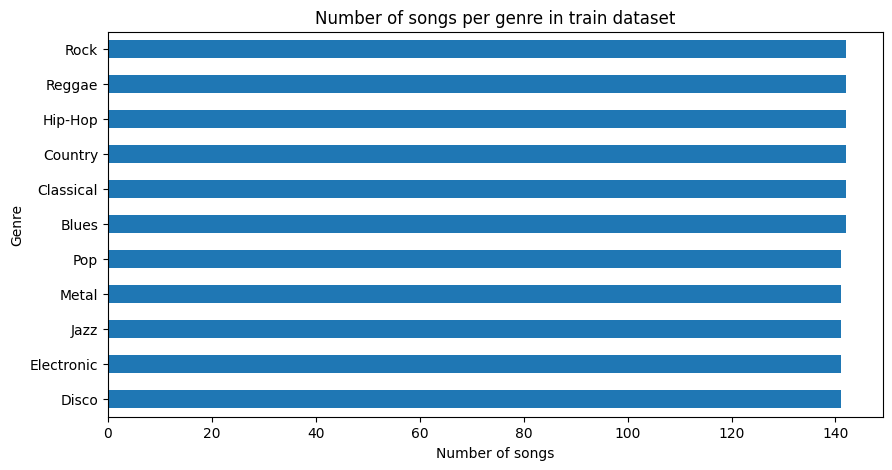

In [34]:
count = train_df.groupby('genre_label')["genre_id"].count()
count.sort_values().plot(kind='barh', figsize=(10, 5))
plt.title("Number of songs per genre in train dataset")
plt.xlabel("Number of songs")
plt.ylabel("Genre")
plt.show()

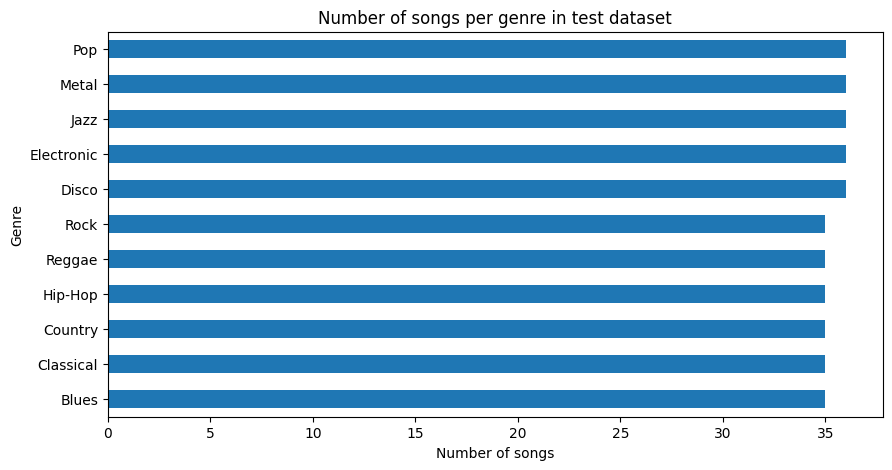

In [35]:
count_test = test_df.groupby('genre_label')["genre_id"].count()
count_test.sort_values().plot(kind='barh', figsize=(10, 5))
plt.title("Number of songs per genre in test dataset")
plt.xlabel("Number of songs")
plt.ylabel("Genre")
plt.show()

In [36]:
# save train and test dataset
train_df.to_csv(os.path.join(PREPARED_DIR, 'train_genres.csv'), index=False)
test_df.to_csv(os.path.join(PREPARED_DIR, 'test_genres.csv'), index=False)